In [1]:
# Adds link to the scripts folder
import sys
import os
sys.path.append("../scripts/")
import matplotlib.pyplot as plt
import numpy as np

import filenames
from hivevo.patients import Patient

from trajectory import Trajectory, create_trajectory_list, filter
from proba_fix import get_nonuniform_bins
from traj_characterisation import *

# Distribution in frequency bins

In [2]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "env"
trajectories = []

for patient_name in patient_names:
    patient = Patient.load(patient_name)
    aft = patient.get_allele_frequency_trajectories(region)
    trajectories = trajectories + create_trajectory_list(patient, region, aft)

syn_traj = [traj for traj in trajectories if traj.synonymous == True]
non_syn_traj = [traj for traj in trajectories if traj.synonymous == False]

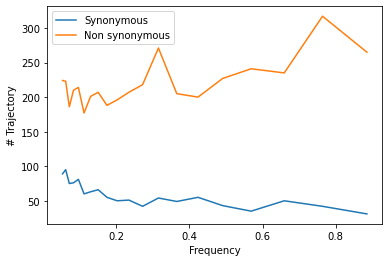

In [7]:
nb_bin = 20
non_uniform_bins = get_nonuniform_bins(nb_bin)
nb_syn = []
nb_non_syn = []

for ii in range(len(non_uniform_bins) - 1):
    nb_s = len([traj for traj in syn_traj if np.sum(np.logical_and(
        traj.frequencies >= non_uniform_bins[ii], traj.frequencies < non_uniform_bins[ii + 1]), dtype=bool)])
    nb_ns = len([traj for traj in non_syn_traj if np.sum(np.logical_and(
        traj.frequencies >= non_uniform_bins[ii], traj.frequencies < non_uniform_bins[ii + 1]), dtype=bool)])

    nb_syn = nb_syn + [nb_s]
    nb_non_syn = nb_non_syn + [nb_ns]

non_uniform_bins = 0.5 * (non_uniform_bins[:-1] + non_uniform_bins[1:])

plt.plot(non_uniform_bins, nb_syn, label="Synonymous")
plt.plot(non_uniform_bins, nb_non_syn, label="Non synonymous")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("# Trajectory")
plt.show()


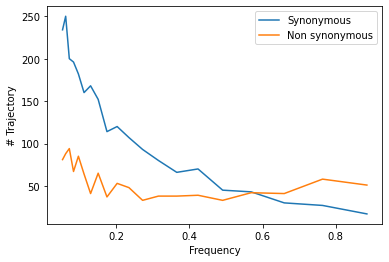

In [3]:
patient_names = ["p1", "p2", "p3", "p4", "p5", "p6", "p8", "p9", "p11"]
region = "pol"
trajectories = []

for patient_name in patient_names:
    patient = Patient.load(patient_name)
    aft = patient.get_allele_frequency_trajectories(region)
    trajectories = trajectories + create_trajectory_list(patient, region, aft)

syn_traj = [traj for traj in trajectories if traj.synonymous == True]
non_syn_traj = [traj for traj in trajectories if traj.synonymous == False]

nb_bin = 20
non_uniform_bins = get_nonuniform_bins(nb_bin)
nb_syn = []
nb_non_syn = []

for ii in range(len(non_uniform_bins) - 1):
    nb_s = len([traj for traj in syn_traj if np.sum(np.logical_and(
        traj.frequencies >= non_uniform_bins[ii], traj.frequencies < non_uniform_bins[ii + 1]), dtype=bool)])
    nb_ns = len([traj for traj in non_syn_traj if np.sum(np.logical_and(
        traj.frequencies >= non_uniform_bins[ii], traj.frequencies < non_uniform_bins[ii + 1]), dtype=bool)])

    nb_syn = nb_syn + [nb_s]
    nb_non_syn = nb_non_syn + [nb_ns]

non_uniform_bins = 0.5 * (non_uniform_bins[:-1] + non_uniform_bins[1:])

plt.plot(non_uniform_bins, nb_syn, label="Synonymous")
plt.plot(non_uniform_bins, nb_non_syn, label="Non synonymous")
plt.legend()
plt.xlabel("Frequency")
plt.ylabel("# Trajectory")
plt.show()


# Duration and lengths of trajectories

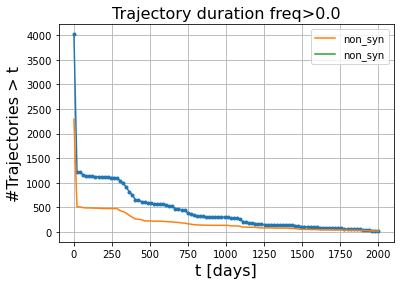

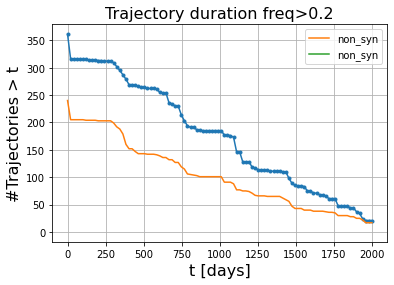

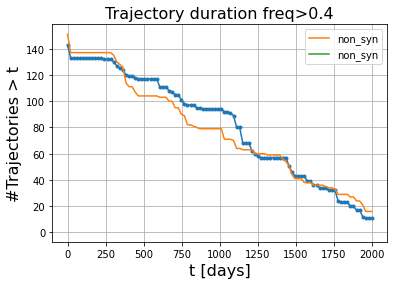

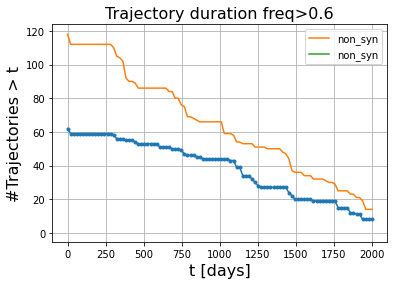

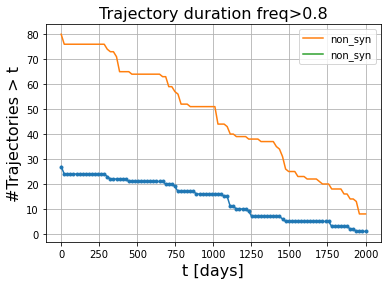

In [4]:
for freq_min in np.arange(0, 1, 0.2):
    filtered_syn = [traj for traj in syn_traj if np.sum(traj.frequencies > freq_min, dtype=bool)]
    filtered_non_syn = [traj for traj in non_syn_traj if np.sum(traj.frequencies > freq_min, dtype=bool)]
    time_bins, nb_syn = get_duration_distribution(filtered_syn)
    time_bins, nb_non_syn = get_duration_distribution(filtered_non_syn)
    plot_duration_distribution(time_bins, nb_syn, freq_min)
    plt.plot(time_bins, nb_non_syn, freq_min, label="non_syn")
    plt.legend()
plt.show()

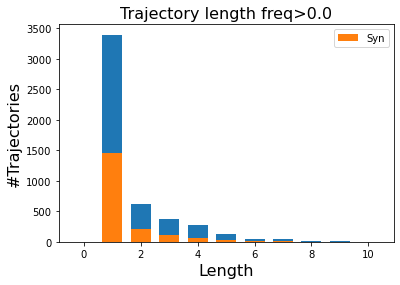

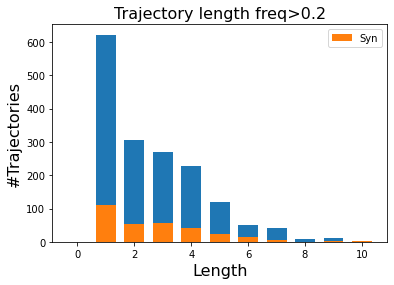

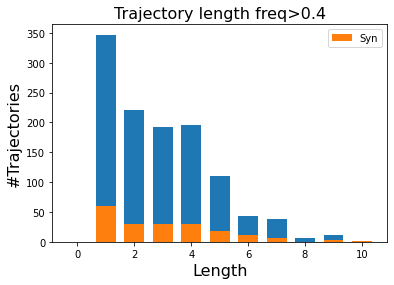

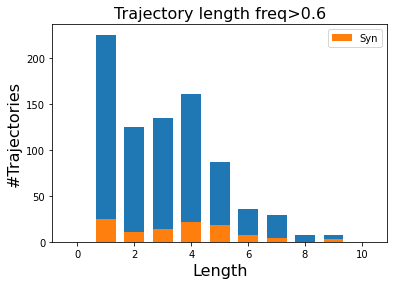

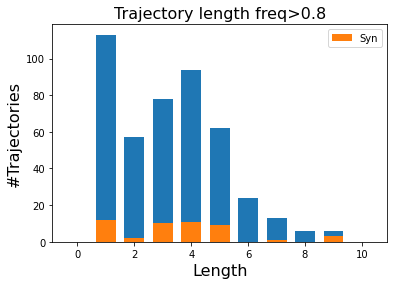

In [10]:
for freq_min in np.arange(0, 1, 0.2):
    filtered_syn = [traj for traj in syn_traj if np.sum(traj.frequencies > freq_min, dtype=bool)]
    filtered_non_syn = [traj for traj in non_syn_traj if np.sum(traj.frequencies > freq_min, dtype=bool)]
    plot_length_distribution(filtered_non_syn, freq_min)
    plt.hist([len(x.t) for x in filtered_syn], bins=range(12), align="left", rwidth=0.7, label="Syn")
    plt.legend()
plt.show()